# KMeans Cluster 
## CIA Country Analysis and Clustering
Source: All these data sets are made up of data from the US government. https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

***Goal :*** Menggali wawasan tentang kesamaan negara dan wilayah di dunia dangan bereksperimen dengan jumlah cluster yang berbeda

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\CIA_Country_Facts.csv')

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


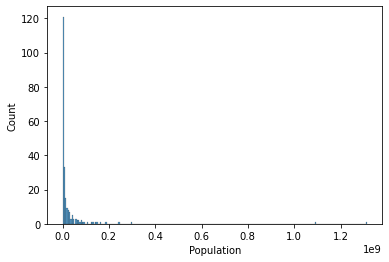

In [7]:
sns.histplot(x='Population', data=df);

In [8]:
sns.set_style('darkgrid')

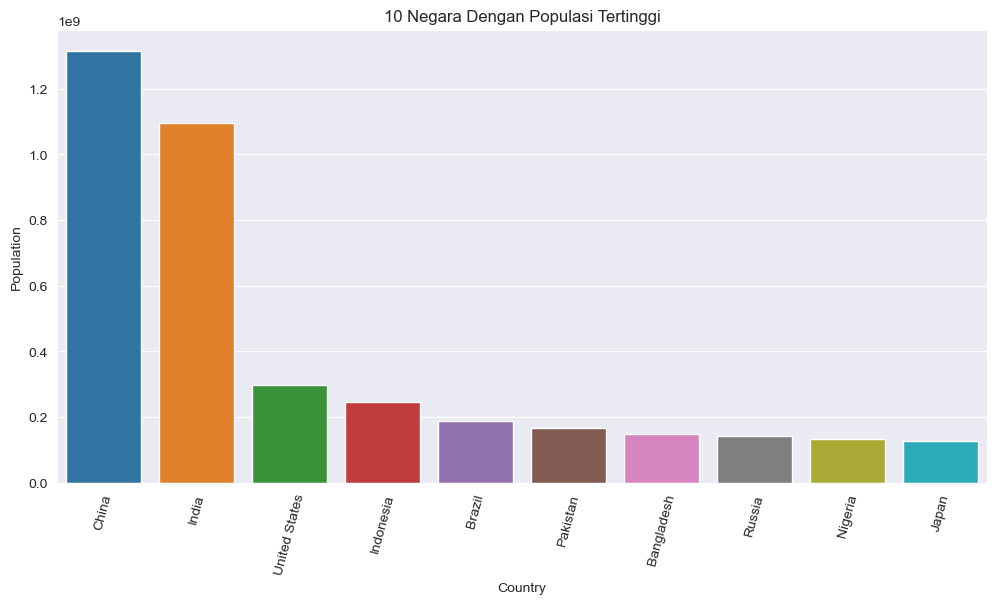

In [9]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x='Country', y='Population', data=df.sort_values('Population', ascending=False).head(10));
plt.title('10 Negara Dengan Populasi Tertinggi')
plt.xticks(rotation =75)
plt.show()

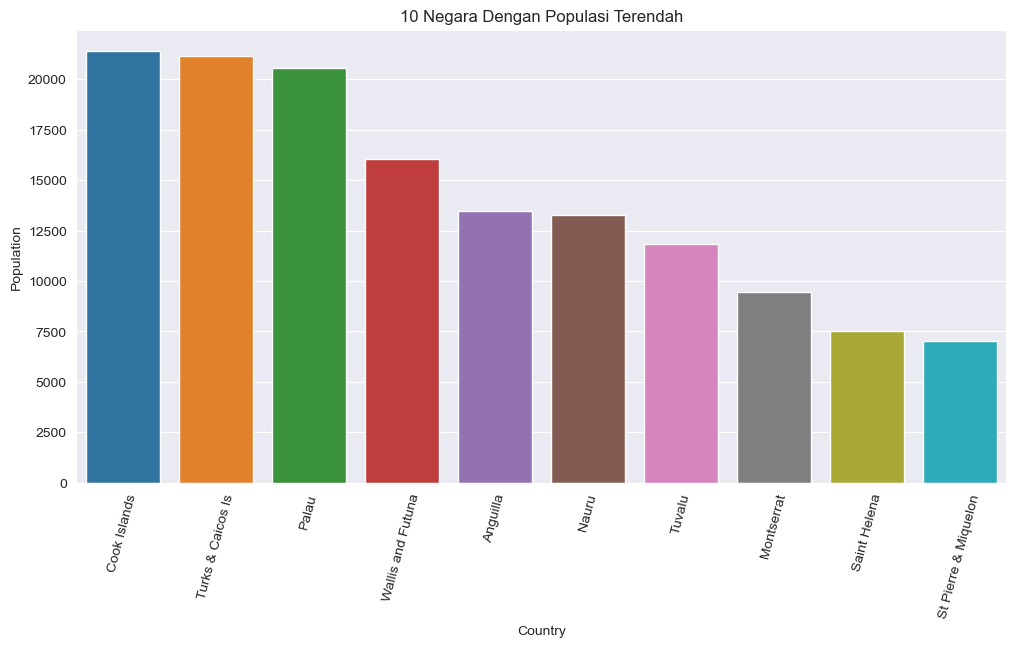

In [10]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x='Country', y='Population', data=df.sort_values('Population', ascending=False).tail(10));
plt.title('10 Negara Dengan Populasi Terendah')
plt.xticks(rotation =75)
plt.show()

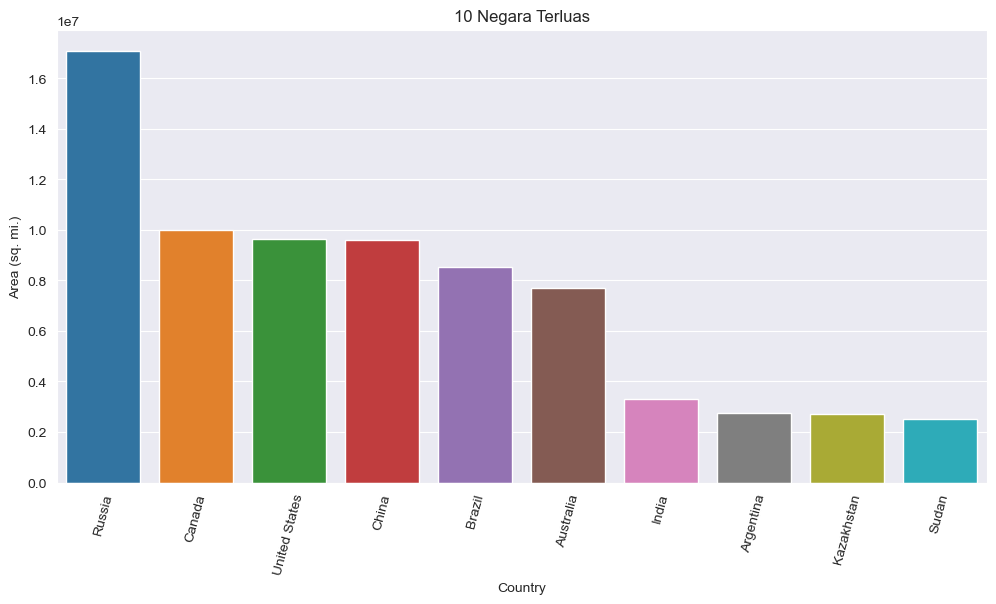

In [11]:
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x='Country', y='Area (sq. mi.)', data=df.sort_values('Area (sq. mi.)', ascending=False).head(10))
plt.title('10 Negara Terluas')
plt.xticks(rotation=75)
plt.show()

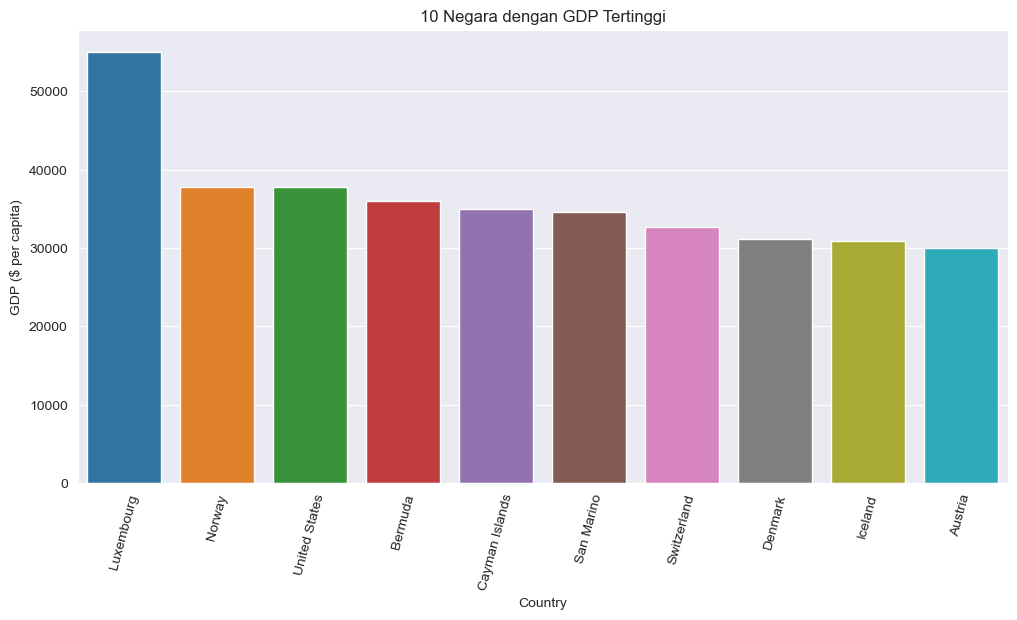

In [12]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x='Country', y='GDP ($ per capita)', data=df.sort_values('GDP ($ per capita)', ascending=False).head(10))
plt.title('10 Negara dengan GDP Tertinggi')
plt.xticks(rotation=75)
plt.show()

In [13]:
data_region = df.groupby('Region')[['Population']].sum()
data_region = data_region.sort_values('Population',ascending=False)
data_region

,Population
Region,
ASIA (EX. NEAR EAST),3687982236
SUB-SAHARAN AFRICA,749437000
LATIN AMER. & CARIB,561824599
WESTERN EUROPE,396339998
NORTHERN AMERICA,331672307
C.W. OF IND. STATES,280081548
NEAR EAST,195068377
NORTHERN AFRICA,161407133
EASTERN EUROPE,119914717


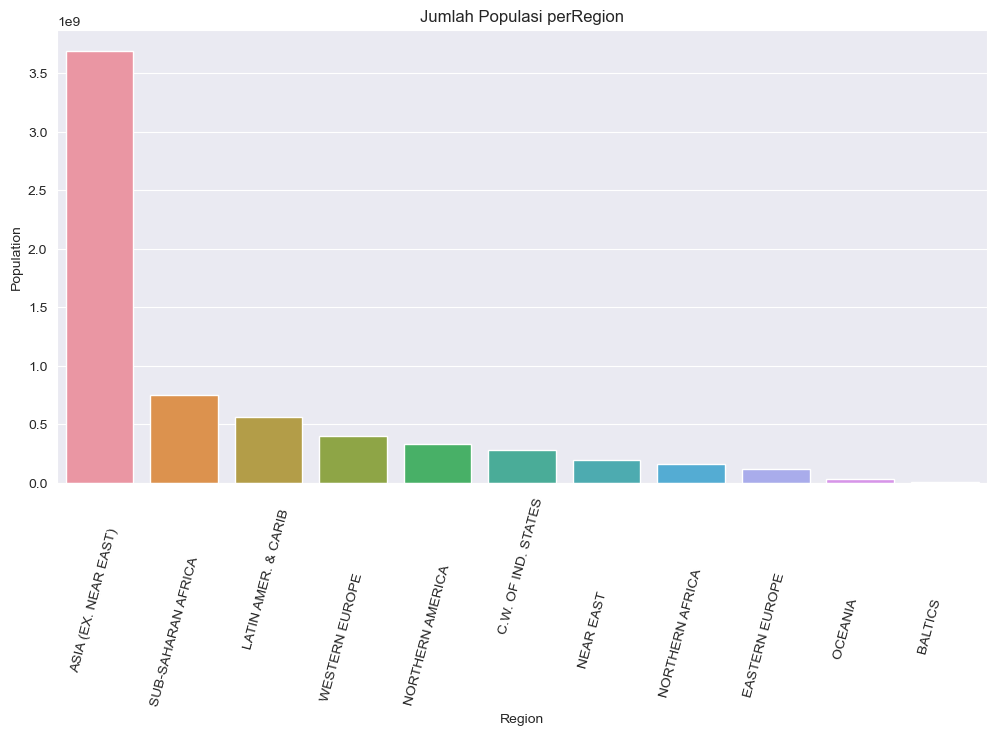

In [14]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=data_region.index, y=data_region['Population'], data=data_region);
plt.title('Jumlah Populasi perRegion')
plt.xticks(rotation= 75)
plt.show()

In [15]:
reg_area = df.groupby('Region')[['Area (sq. mi.)']].sum()
reg_area = reg_area.sort_values('Area (sq. mi.)', ascending= False)
reg_area

,Area (sq. mi.)
Region,
SUB-SAHARAN AFRICA,24341406
ASIA (EX. NEAR EAST),23096712
C.W. OF IND. STATES,22100843
NORTHERN AMERICA,21782471
LATIN AMER. & CARIB,20544084
OCEANIA,8519812
NORTHERN AFRICA,6018890
NEAR EAST,4355586
WESTERN EUROPE,3710478


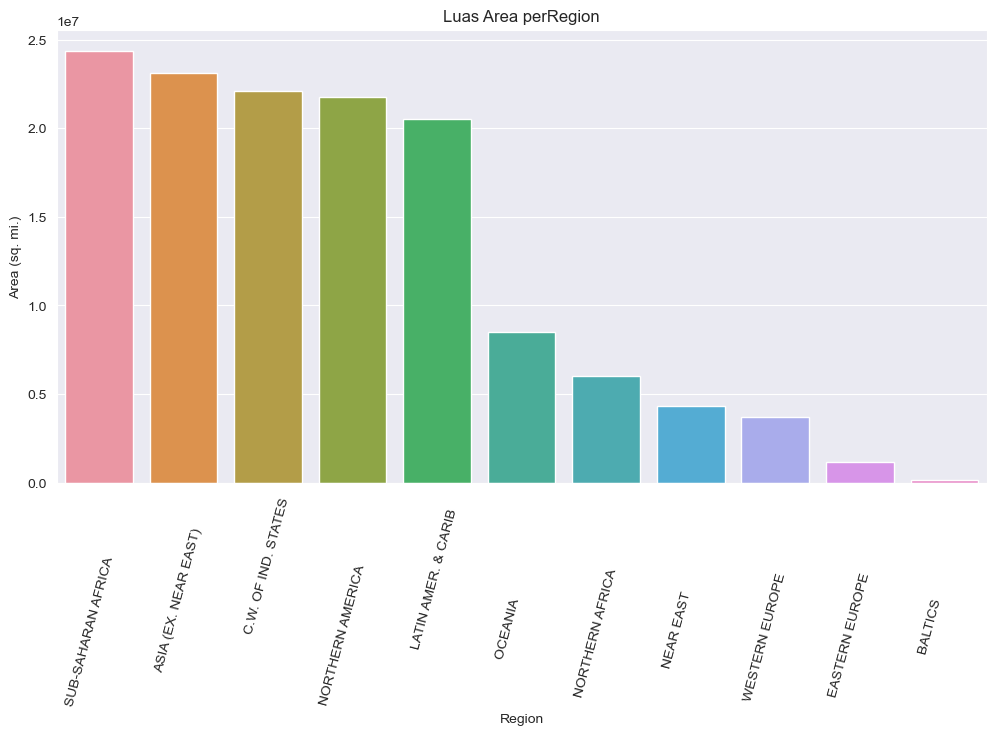

In [16]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=reg_area.index, y='Area (sq. mi.)', data=reg_area);
plt.title('Luas Area perRegion')
plt.xticks(rotation=75)
plt.show()

In [17]:
reg_dgp = df.groupby('Region')[['GDP ($ per capita)']].sum()
reg_dgp = reg_dgp.sort_values('GDP ($ per capita)', ascending=False)
reg_dgp

,GDP ($ per capita)
Region,
WESTERN EUROPE,757300.0
LATIN AMER. & CARIB,390700.0
ASIA (EX. NEAR EAST),225500.0
OCEANIA,173200.0
NEAR EAST,167300.0
NORTHERN AMERICA,130500.0
SUB-SAHARAN AFRICA,118500.0
EASTERN EUROPE,117700.0
C.W. OF IND. STATES,48000.0


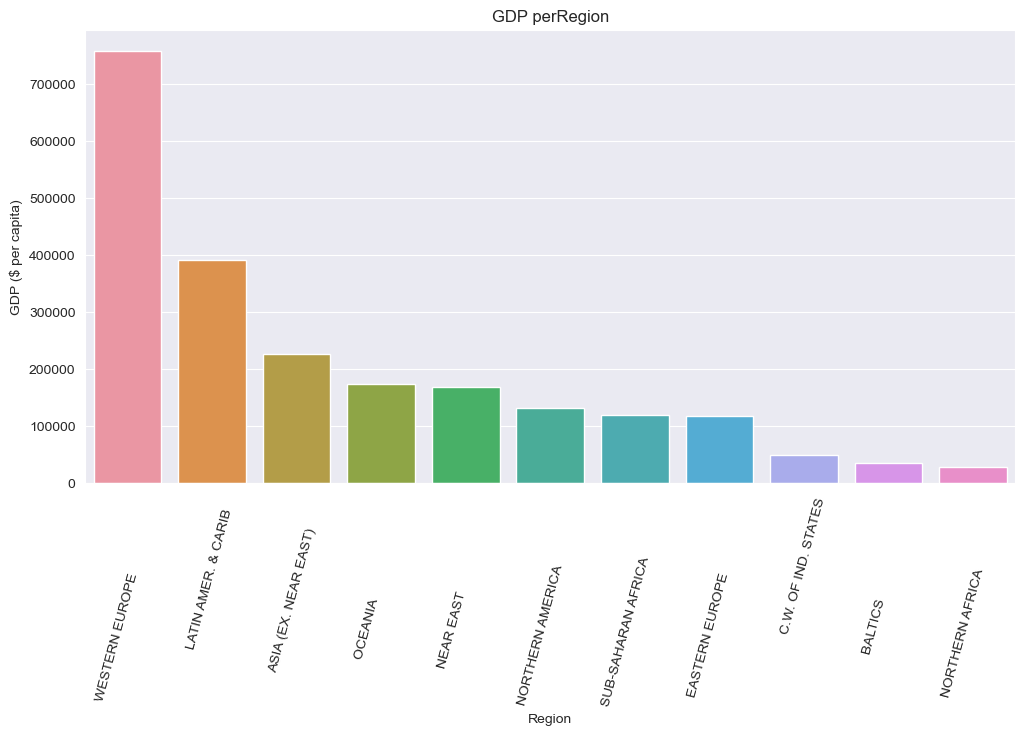

In [18]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=reg_dgp.index, y='GDP ($ per capita)', data=reg_dgp)
plt.title('GDP perRegion')
plt.xticks(rotation=75)
plt.show()

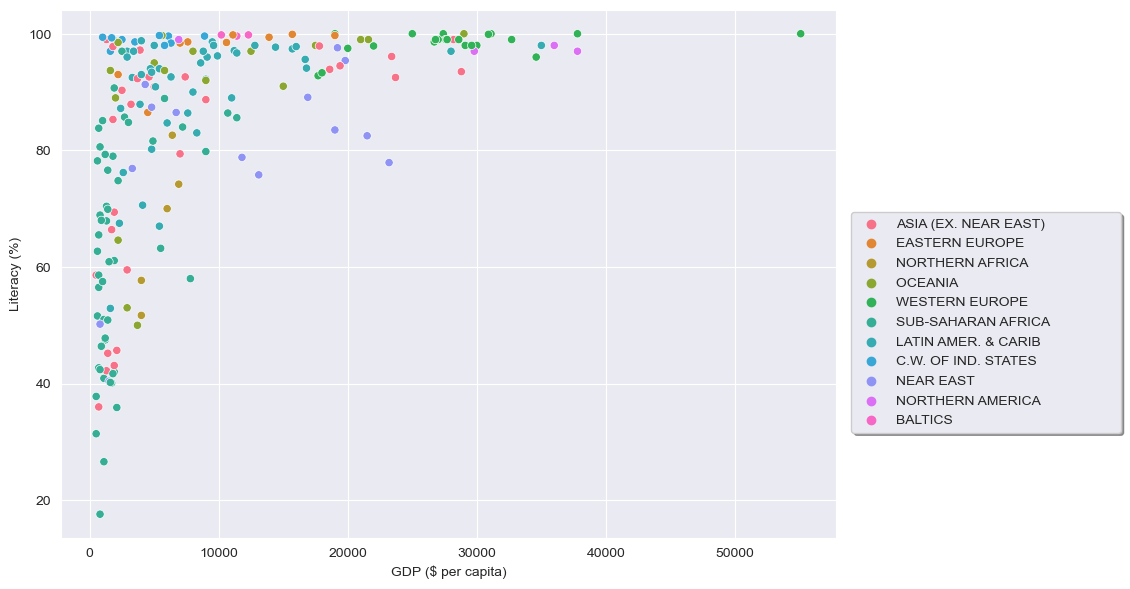

In [19]:
plt.figure(figsize=(10, 7), dpi=100)
sns.scatterplot(x='GDP ($ per capita)', y='Literacy (%)', hue='Region', data=df)
plt.legend(loc=(1.02, 0.2), shadow=True)
plt.show()

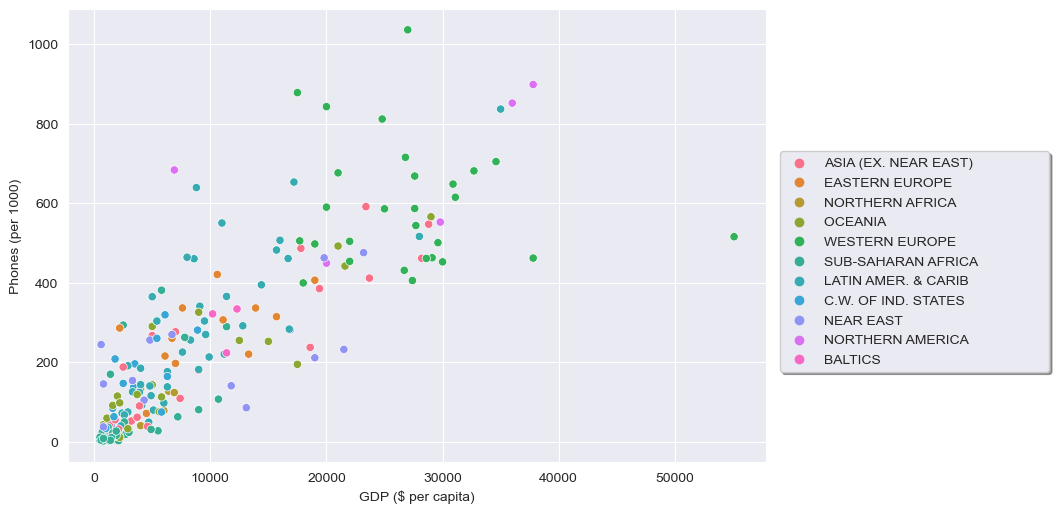

In [20]:
plt.figure(figsize=(9,6), dpi=100)
sns.scatterplot(x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region', data=df);
plt.legend(loc=(1.02, 0.2), shadow=True)
plt.show()

In [21]:
sns.set_style('whitegrid')

In [22]:
plt.style.use('default')

In [23]:
# matrix
matrix = df.corr()

# mask
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True

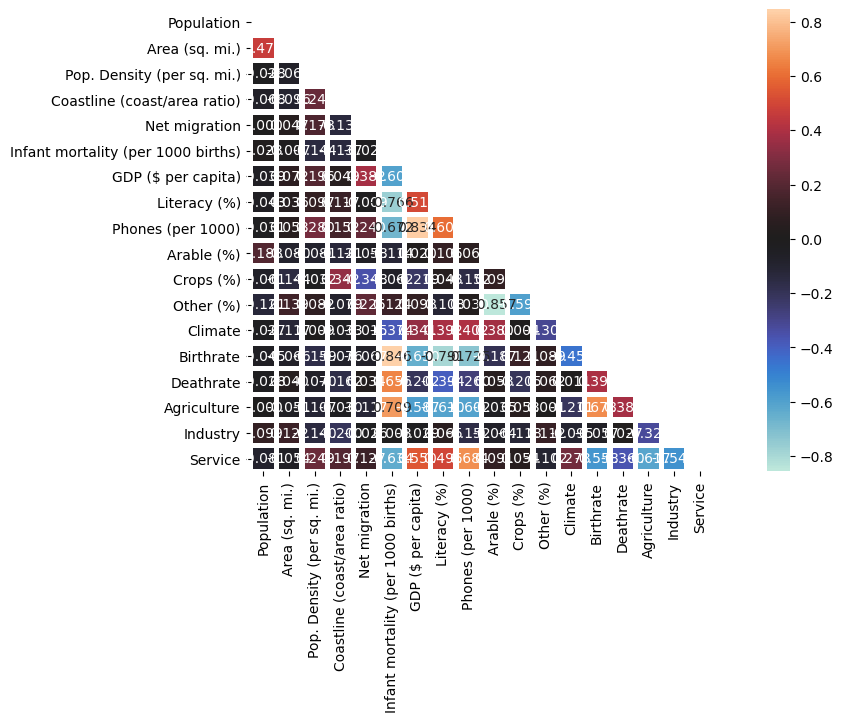

In [24]:
plt.figure(figsize=(14,6), dpi=100)
sns.heatmap(matrix, mask=mask, lw=3, annot=True, center=0, fmt='.3f', square=True);

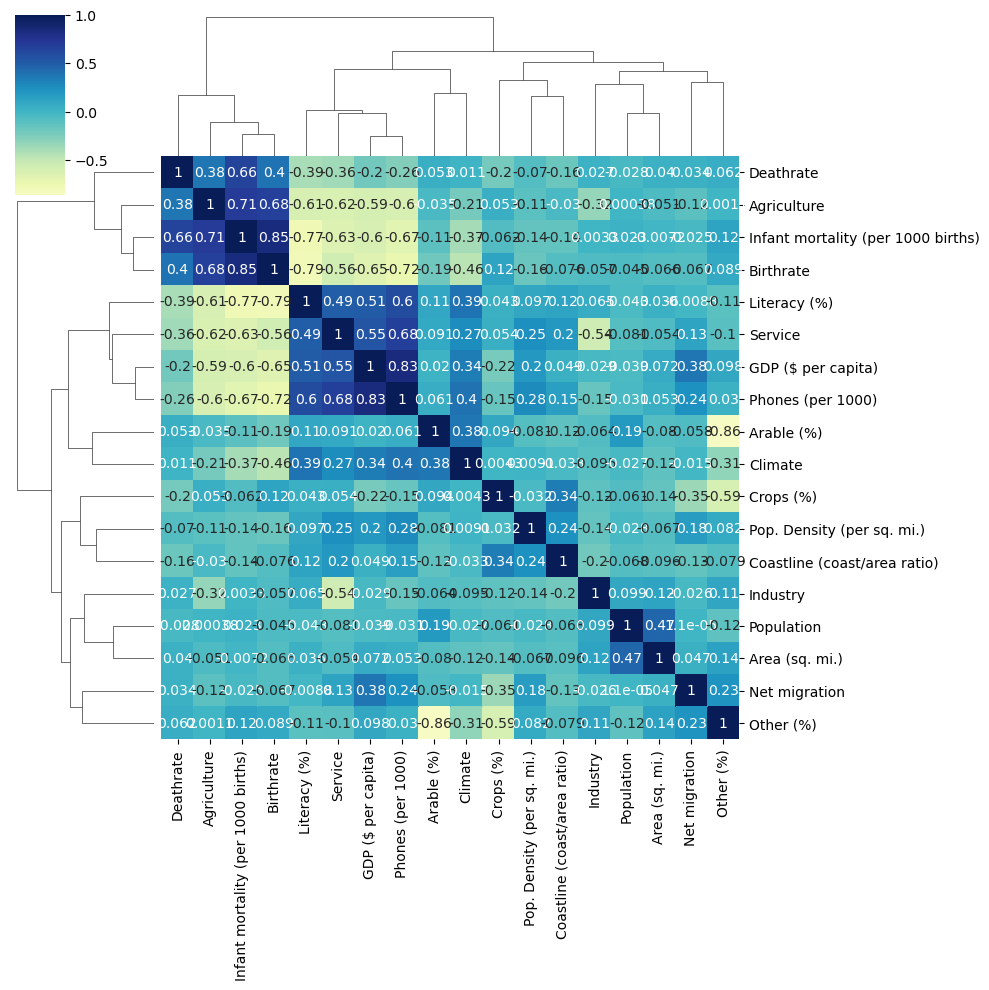

In [25]:
sns.clustermap(matrix, annot=True, cmap="YlGnBu", center=0)
plt.show()

## EDA
### data cleaning

In [26]:
# missing data
df_null = round(100 * df.isna().sum()/len(df),2)
df_null

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [27]:
# negara yang tidak memiliki lahan pertanian
df[df['Agriculture'].isna()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

* Dari 15 negera yang tidak memiliki lahan pertanian karena luas area negara atau pulaunya terlalu kecil dan 
seperti Greenland dan Western Sahara wilayahnya tidak mungkin di tanami kerana cuacanya terlalu ektrim

In [28]:
# fillna 0 pada Agriculture
df[df['Agriculture'].isna()] = df[df['Agriculture'].isna()].fillna(0)

In [29]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

*  ada beberapa negara tidak mempunyai iklim hal tersebut tidak mugkin terjadi, isi iklim dengan nilai rata-rata iklim perRegion

In [30]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [31]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

* Literacy (%) di isi sama dengan iklim menggunakan rata-rata perwilayah

In [32]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [33]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [34]:
# hapus sisa null values
df = df.dropna()

In [35]:
df.shape

(221, 20)

### Feature engenering

In [36]:
X = df.drop('Country', axis=1)

In [37]:
df_dummies = pd.get_dummies(X)
df_dummies

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
df_scaler = scaler.fit_transform(df_dummies)

In [41]:
df_scaler

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

# Model KMeans Clusters

In [42]:
from sklearn.cluster import KMeans

In [43]:
model = KMeans(n_clusters= 4, max_iter = 50)

In [44]:
cls = model.fit(df_scaler)

In [45]:
cls.labels_

array([2, 1, 3, 3, 0, 2, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 2, 3, 1, 0, 3, 2,
       0, 2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 1, 3, 1, 0, 2, 3, 3, 3, 3, 3, 2, 2, 1, 2, 0, 3, 0,
       0, 3, 3, 2, 2, 3, 1, 0, 2, 0, 0, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 0,
       1, 0, 2, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 1, 2, 3, 3, 0, 3, 3, 2,
       1, 3, 2, 2, 3, 0, 1, 0, 0, 1, 2, 2, 3, 3, 2, 0, 3, 3, 2, 1, 2, 3,
       3, 1, 3, 3, 3, 2, 2, 3, 2, 0, 3, 3, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3,
       3, 3, 3, 3, 1, 0, 3, 3, 3, 1, 0, 2, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2,
       3, 2, 0, 1, 1, 3, 2, 2, 0, 3, 2, 3, 2, 0, 0, 3, 0, 2, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 1, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2])

### method Elbow
* Mencari jumlah optimal dari cluster (k) dengan menggunakan metode ***Elbow Curve***.

* ***Elbow Curve***, merupakan salah satu metode yang bisa digunakan untuk menemukan jumlah optimal dari cluster (k)


In [46]:
ssd = []
for k in range(2,25):
    # model
    model = KMeans(n_clusters=k, max_iter=50)
    model.fit(df_scaler)
    
    ssd.append(model.inertia_)

In [47]:
plt.style.use(['science','notebook','grid'])

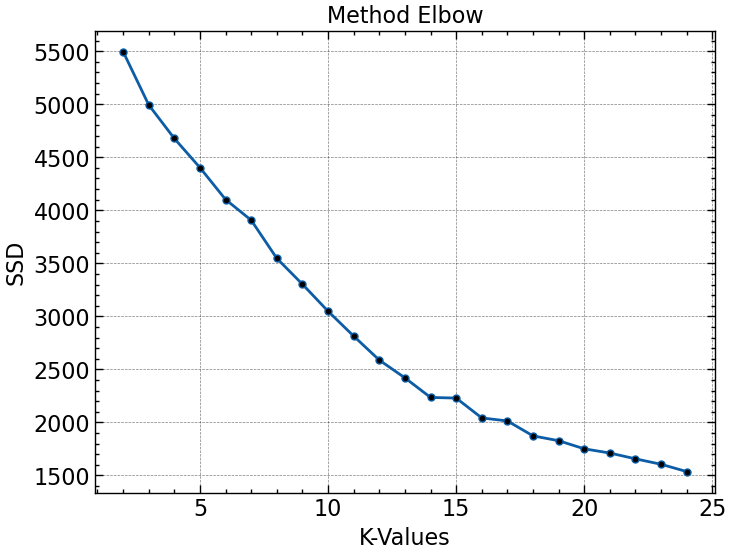

In [48]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(range(2, 25), ssd, 'o-',markersize=5, markerfacecolor='black')
plt.title('Method Elbow')
plt.xlabel('K-Values')
plt.ylabel('SSD')
plt.show()

* **Silhouette Analysis**
Secara umum, algoritma dari Silhouette analysis yaitu mengukur seberapa dekat (baik) setiap titik pada sebuah cluster dengan titik-titik data lain di clusternya. Semakin tinggi nilai rata-rata dari silhouette, menunjukkan suatu peng-cluster-an yang baik


### $\text{Silhouette score =}\frac{p-q}{max(p,q)}$

In [49]:
# Silhouette score
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [50]:
kmean_for_k = [KMeans(n_clusters= k, max_iter = 50).fit(df_scaler) for k in range(2, 25)]

silhouete_score = [silhouette_score(df_scaler, model.labels_)
                  for model in kmean_for_k[1:]]

In [51]:
silhouete_score

[0.15303709495851545,
 0.16197763266665305,
 0.1976911653367888,
 0.20499879425878376,
 0.23756502017526593,
 0.26694520363338364,
 0.2713942903374013,
 0.29451951581354613,
 0.2907873016349226,
 0.3231237344577641,
 0.2762166818839223,
 0.33585002172652384,
 0.33883690480936524,
 0.30005996823374936,
 0.2966386151912714,
 0.3044458839559526,
 0.3084674699526967,
 0.2622662185575992,
 0.27709084675837314,
 0.2804434815274619,
 0.2830910729861331,
 0.2601501249434507]

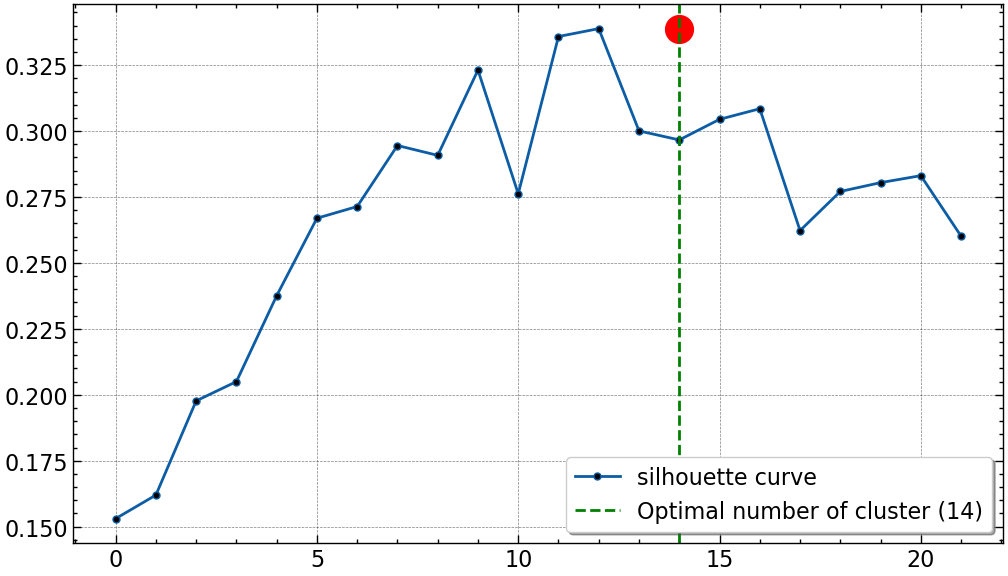

In [52]:
plt.figure(figsize=(12, 7), dpi=100)
plt.plot(silhouete_score,'o-', markerfacecolor='black', markersize=5, label='silhouette curve')

k = np.argmax(silhouete_score) + 2

plt.axvline(x=k, ls='--', c='green',label = 'Optimal number of cluster ({})'.format(k))

plt.scatter(k, silhouete_score[k-2], c='red', s=400)

plt.legend(shadow=True)
plt.show()

* Hasil peritungan **silhouette score** cluster=14 (k12) menghasilkan nilai tertinggi

## Final Model KMeans clusters

In [69]:
k14 = KMeans(n_clusters = 14, max_iter =50)

In [70]:
cluster = k14.fit(df_scaler)

In [71]:
cluster_label = cluster.labels_

In [72]:
cluster_label

array([ 8,  6,  7, 10,  1,  4,  5,  5,  5,  9,  5, 10,  1,  9,  5, 11,  2,
        5,  9,  1,  5,  8, 13,  2,  5,  6,  4,  5,  5,  2,  6,  8,  2,  8,
        2,  8, 13,  4,  1,  8,  8,  5, 13,  5,  8,  8,  4,  5,  8,  6,  5,
        6,  1,  4,  5,  5,  5,  7,  5,  4,  4, 12,  8,  1, 10,  1,  1,  5,
       10,  4,  8, 11,  9,  1,  8,  3,  1, 13,  5,  5, 10,  5,  8,  8,  5,
        8,  5,  3,  6,  1,  2,  2,  2, 11,  1,  1, 11,  1,  5,  2,  1, 11,
        9,  4,  0,  2,  2, 11,  9,  2, 12, 11,  4,  8,  7,  1, 12,  1,  3,
        6,  8,  8,  2,  2,  8,  1,  0,  5,  8,  5,  8,  5,  0,  9,  2,  5,
        7,  8,  4, 10,  2,  1,  5, 10, 10,  5,  8,  8, 10,  1, 11,  2, 10,
        5, 10,  5,  5,  2,  6,  1,  5, 11,  5,  6,  9,  8,  4,  5,  5, 13,
        5, 10,  1,  0, 11,  8,  5,  8,  3,  6,  6, 10,  8,  4,  1,  2,  8,
        5,  4,  1,  1, 11,  2,  9,  8,  2,  8,  0,  5,  7, 11,  9,  5, 10,
        8,  9, 11,  1, 13,  5,  9, 10,  5,  2,  5, 10, 11,  7, 11,  4,  4])

In [73]:
X['k12 cluster'] = cluster_label

In [74]:
X.corr()['k12 cluster'].sort_values()

GDP ($ per capita)                   -0.256461
Service                              -0.236041
Literacy (%)                         -0.229986
Climate                              -0.225256
Phones (per 1000)                    -0.204579
Crops (%)                            -0.140316
Pop. Density (per sq. mi.)           -0.093898
Coastline (coast/area ratio)         -0.073300
Arable (%)                           -0.065589
Net migration                        -0.043429
Deathrate                            -0.014163
Industry                              0.007781
Population                            0.041229
Other (%)                             0.102866
Agriculture                           0.134990
Infant mortality (per 1000 births)    0.140944
Birthrate                             0.207704
Area (sq. mi.)                        0.219910
k12 cluster                           1.000000
Name: k12 cluster, dtype: float64

In [75]:
X.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,k12 cluster
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,8
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,6
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,7
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,10
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,1


* Gabungkan label cluster, Kode ISO, dan Nama Negara untuk membuat peta dunia

In [76]:
iso_codes = pd.read_csv(r'C:\Users\Data\dataset\DATA\country_iso_codes.csv')

In [77]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [78]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [79]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [80]:
df['iso_codes'] = df['Country'].map(iso_mapping)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,iso_codes,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,8
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,10
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,9
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,3


In [81]:
df['Cluster'] = cluster_label
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,iso_codes,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,8
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,6
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,7
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,10
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,1


In [82]:
import plotly.express as px

fig = px.choropleth(df, locations='iso_codes',
                   color='Cluster',
                   hover_name='Country',
                   color_continuous_scale='rainbow')
fig.show()